In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model, tree, metrics
from sklearn.metrics import mean_squared_error, r2_score

# Get the data 
df_test = pd.read_csv("2019_test.csv")
df_train = pd.read_csv("2019_train.csv")
df_test = df_test.drop(columns=["Unnamed: 0"])
df_train = df_train.drop(columns=["Unnamed: 0"])
df_train.head()

,Player,Tm,Pos,Age,Fumbles,FantasyPoints,TDs,YDs,Touches
0,Rashard Mendenhall,PIT,RB,22.0,3.0,203.9,8.0,1369.0,267.0
1,Dede Westbrook,JAX,WR,26.0,1.0,152.7,3.0,687.0,71.0
2,Melvin Gordon,LAC,RB,24.0,1.0,288.1,12.0,1581.0,342.0
3,Jared Cook,STL,TE,27.0,0.0,133.4,3.0,634.0,53.0
4,Jeremiah Johnson,DEN,RB,24.0,0.0,20.9,0.0,139.0,21.0


In [69]:
# Set up the training models in a list 
x_train = df_train.drop(columns=["Player", "Age", "Tm", "Pos", "Fumbles", "FantasyPoints"]).to_numpy()
x_test = df_test.drop(columns=["Player", "Age", "Tm", "Pos", "Fumbles", "FantasyPoints"]).to_numpy()

y_train = df_train["FantasyPoints"].to_numpy()
y_test = df_test["FantasyPoints"].to_numpy()

In [70]:
regr = linear_model.LinearRegression()
model = regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [71]:
df_test['PredictedPoints'] = y_pred

In [72]:
df_test.head()

,Player,Tm,Pos,Age,Fumbles,FantasyPoints,TDs,YDs,Touches,PredictedPoints
0,Mike Hart,IND,RB,23.0,0.0,23.40,1.0,124.0,31.0,61.825982
1,T.J. Hockenson,DET,TE,22.0,0.0,80.70,2.0,367.0,32.0,85.452706
2,Emmanuel Sanders,DEN,WR,27.0,1.0,299.80,9.0,1448.0,109.0,180.373770
3,Brian Hoyer,NWE,QB,25.0,0.0,6.08,1.0,114.0,25.0,63.096907
4,Dez Bryant,DAL,WR,25.0,3.0,292.40,13.0,1234.0,94.0,191.721417


In [73]:
df_test['+/-'] = np.where(df_test['PredictedPoints'] > df_test['FantasyPoints'], False, True)
df_test.head()

,Player,Tm,Pos,Age,Fumbles,FantasyPoints,TDs,YDs,Touches,PredictedPoints,+/-
0,Mike Hart,IND,RB,23.0,0.0,23.40,1.0,124.0,31.0,61.825982,False
1,T.J. Hockenson,DET,TE,22.0,0.0,80.70,2.0,367.0,32.0,85.452706,False
2,Emmanuel Sanders,DEN,WR,27.0,1.0,299.80,9.0,1448.0,109.0,180.373770,True
3,Brian Hoyer,NWE,QB,25.0,0.0,6.08,1.0,114.0,25.0,63.096907,False
4,Dez Bryant,DAL,WR,25.0,3.0,292.40,13.0,1234.0,94.0,191.721417,True


In [74]:
model.intercept_


57.31801905519047

In [75]:
model.coef_

array([ 5.61125547,  0.07552744, -0.33769985])

In [76]:
y_true = df_test['FantasyPoints'].to_numpy()
r2_score(y_true, y_pred)

0.6236315545316522

In [77]:
df_train.head()

,Player,Tm,Pos,Age,Fumbles,FantasyPoints,TDs,YDs,Touches
0,Rashard Mendenhall,PIT,RB,22.0,3.0,203.9,8.0,1369.0,267.0
1,Dede Westbrook,JAX,WR,26.0,1.0,152.7,3.0,687.0,71.0
2,Melvin Gordon,LAC,RB,24.0,1.0,288.1,12.0,1581.0,342.0
3,Jared Cook,STL,TE,27.0,0.0,133.4,3.0,634.0,53.0
4,Jeremiah Johnson,DEN,RB,24.0,0.0,20.9,0.0,139.0,21.0


In [78]:
df_plot = df_train.drop(columns=["Player", "Age", "Tm", "Fumbles", "Pos"])
df_train = df_train[['Fumbles','TDs','YDs', 'Touches','FantasyPoints']]

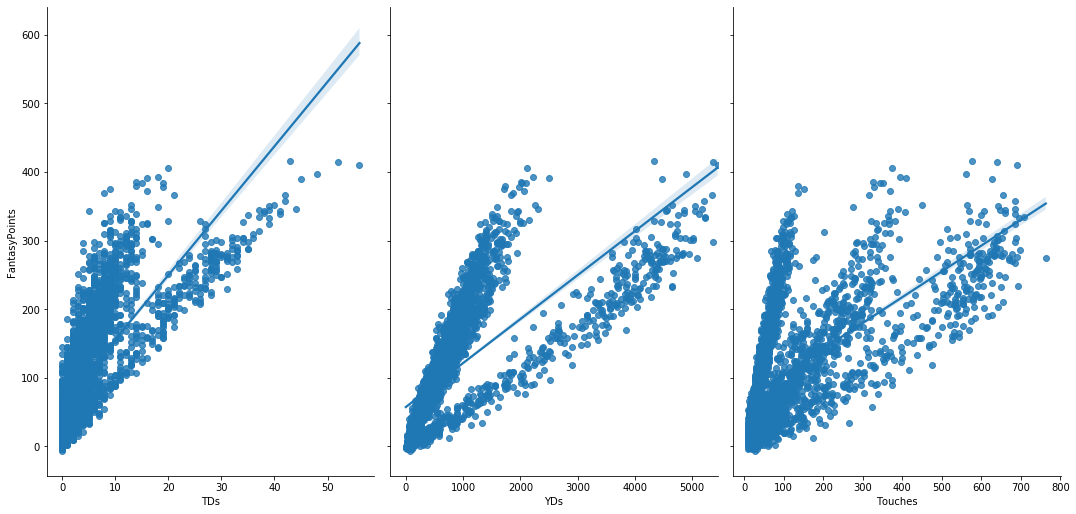

In [83]:
sns.pairplot(df_plot, x_vars=['TDs','YDs','Touches'], y_vars='FantasyPoints', height=7, aspect=0.7, kind='reg')

In [67]:
df_test.to_csv("./performance.csv")